## HW05 Diving into Podcast Reviews 
## What are listeners saying about TV-Film Podcasts

### By Donovan Manogue

### 3. Import Libraries 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_49779/3493753957.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:
# importing necessary libraries for this hoemwork

## 4. Import Data from URL

In [7]:
podcastreviews = pd.ExcelFile('Homework5_Data/PodcastReviews.xlsx')

In [8]:
print(podcastreviews.sheet_names)

['categories', 'podcasts', 'reviews']


In [9]:
df_categories = podcastreviews.parse('categories',index_col=0)
df_podcasts = podcastreviews.parse('podcasts',index_col=0)
df_reviews = podcastreviews.parse('reviews', index_col =0)

In [10]:
# importing our data from the excel file, making sure we get all of the sheet names and turn them into their own dataframe

## 5. Create the DataFrames for our analysis

#### **Objective:** Since we are only interested in TV-film podcasts for our analysis, we will need to create a DataFrame that includes the information needed filtered based on tv-film. Below are the columns to include in a new DataFrame and its original table origination. We will also be separating the reviews that are 5-stars and the reviews that are 1-stars. This will allow us to see if the text within the reviews differs much based on ratings.

#### You are creating four DataFrames:
##### • df_pod_reviews
##### o All reviews with columns from df_podcasts, df_categories, df_reviews
##### • df_pod_film
##### o Reviews from df_pod_reviews that are filtered based on tv-film
##### • df_pod_film_5
##### o Reviews from df_pod_film that are filtered for a rating of 5.
##### • df_pod_film_1
##### o Reviews from df_pod_film that are filtered for a rating of 1.

### 5a. Create df_pod_reviews

In [15]:
df_podcasts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46640 entries, 0 to 46639
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   podcast_id  46640 non-null  object
 1   itunes_id   46640 non-null  int64 
 2   slug        46640 non-null  object
 3   itunes_url  46640 non-null  object
 4   title       46640 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [16]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70918 entries, 0 to 70917
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   podcast_id  70918 non-null  object
 1   category    70918 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [17]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870075 entries, 850036 to 341556
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   podcast_id  870075 non-null  object
 1   title       870048 non-null  object
 2   content     870075 non-null  object
 3   rating      870075 non-null  int64 
 4   created_at  870075 non-null  object
dtypes: int64(1), object(4)
memory usage: 39.8+ MB


In [18]:
df_reviews = df_reviews.rename(columns={'title':'review_title'})
df_reviews

,podcast_id,review_title,content,rating,created_at
850036,b73a459e3b7c4c06805d29349ba3c8cc,Entertaining but far from unbiased,I enjoy the commentary because it is often int...,3,2019-11-25T15:31:39-07:00
921252,f74a2de3664e902de10ba6cebfbb9138,J Vernon of the modern day.,He is one of my favorite applicable expository...,5,2020-02-14T05:42:04-07:00
328519,e6a00db98ea70e499322f971cf05daf6,The best!,One of my favorites the man is very knowledgea...,5,2015-11-01T19:54:36-07:00
497132,d58afe3d7c6a7da11b232e3675a78adf,Great Podcast! Always an interesting topic,As a fellow developer I gain much insight and ...,5,2014-02-23T08:25:25-07:00
946707,e6d4ad80ac5d64b3ff28462806094b73,10/10,Great podcast and store,5,2020-03-17T15:37:42-07:00
...,...,...,...,...,...
336978,a5416c179e94a74e61827c88e405b083,best of npr,Amazing show that handles topics everyone reco...,5,2018-10-02T15:27:22-07:00
638902,af57f2b362ae57b7bb06a5a9b47c879c,And Especially You,What a great surprise! I just can’t wait to he...,5,2019-02-20T21:02:18-07:00
187771,bb3c48ce6509dca13447b563ea7dbcc0,Amazingly funny,Great podcast guys! Informative and funny vid...,5,2016-07-26T14:23:12-07:00
466592,c57857b7e06ff8a97a4876f52ac5aaf4,Just as excited as I was,When I heard the news I was beside my self. ...,5,2012-11-03T09:47:59-07:00


In [19]:
df_pod_reviews= pd.merge(df_podcasts,df_categories, how='inner',on='podcast_id') \
.merge(df_reviews, how='inner', on='podcast_id')
df_pod_reviews

,podcast_id,itunes_id,slug,itunes_url,title,category,review_title,content,rating,created_at
0,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando,christianity,Good Sernons,I'm a regular listener. I only wish that the ...,5,2019-10-08T04:23:32-07:00
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando,religion-spirituality,Good Sernons,I'm a regular listener. I only wish that the ...,5,2019-10-08T04:23:32-07:00
2,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters,business,Love your show!,"Hi KT, I love listening to your show and I hav...",5,2018-11-24T17:06:55-07:00
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters,business,Very Insightful!,Really enjoy this podcast! Quick and to the po...,5,2018-01-18T21:59:11-07:00
4,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters,business,Inspiration & Information,Inspiration & Information that transforms busi...,5,2018-05-11T18:40:15-07:00
...,...,...,...,...,...,...,...,...,...,...
1070100,ffff66f98c1adfc8d0d6c41bb8facfd0,1435731839,whos-bringing-wine,https://podcasts.apple.com/us/podcast/whos-bri...,Who’s Bringing Wine?,comedy,Honest and fun,These girls give an honest and fun look at sin...,5,2018-10-13T09:40:46-07:00
1070101,ffff66f98c1adfc8d0d6c41bb8facfd0,1435731839,whos-bringing-wine,https://podcasts.apple.com/us/podcast/whos-bri...,Who’s Bringing Wine?,comedy,"Casual, fun and informative",Such a great podcast! Feels like you are in th...,5,2018-10-13T07:58:46-07:00
1070102,ffff66f98c1adfc8d0d6c41bb8facfd0,1435731839,whos-bringing-wine,https://podcasts.apple.com/us/podcast/whos-bri...,Who’s Bringing Wine?,comedy,Real and honest!,Enjoyed listening and appreciate how real and ...,5,2018-10-15T13:29:00-07:00
1070103,ffff923482740bc21a0fe184865ec2e2,1271277212,tefl-waffle,https://podcasts.apple.com/us/podcast/tefl-waf...,TEFL Waffle,education,CELTA tutor in Beijing,This is an extremely informative podcast for a...,5,2019-03-29T21:33:13-07:00


In [20]:
df_pod_reviews['category'].value_counts()

category
society-culture                      191806
comedy                               171302
business                              95593
tv-film                               86203
education                             82004
arts                                  68710
religion-spirituality                 64273
kids-family                           40761
christianity                          40039
society-culture-personal-journals     36286
music                                 31020
business-careers                      28592
technology                            25491
business-investing                    18902
spirituality                          16331
arts-performing-arts                  15698
society-culture-philosophy            14757
society-culture-places-travel         13693
arts-visual-arts                       8690
arts-food                              7586
arts-design                            5166
arts-fashion-beauty                    4573
judaism                

In [21]:
#in this section I merged all of our data together into one dataframe

### 5b Create df_pod_film

In [23]:
df_pod_film = df_pod_reviews[df_pod_reviews['category']== 'tv-film']

In [24]:
df_pod_film['rating'].value_counts()

rating
5    72174
1     5842
4     3296
3     2562
2     2329
Name: count, dtype: int64

In [25]:
#In this section I created the datafram df_pod_film by making sure to make a dataframe category that matches with tv film

### 5c. create df_pod_film_5

In [27]:
df_pod_film_5 = df_pod_film[df_pod_film['rating']== 5]

In [28]:
df_pod_film_5['rating'].value_counts()

rating
5    72174
Name: count, dtype: int64

In [29]:
#In this section I created the datafram df_pod_film_5 by making sure to make a dataframe ratings are only 5s 

### 5d. create df_pod_film_1

In [31]:
df_pod_film_1 = df_pod_film[df_pod_film['rating']== 1]

In [32]:
df_pod_film_1['rating'].value_counts()

rating
1    5842
Name: count, dtype: int64

In [33]:
#In this section I created the datafram df_pod_film_1 by making sure to make a dataframe ratings are only 1s 

### 5e. create text strings for content

In [35]:
text_reviews_5 =df_pod_film_5['content'].to_string()
text_reviews_1= df_pod_film_1['content'].to_string()

## 6. Create a wordcloud for 5-star reviews 

#### **OBJECTIVE:** Let’s get a visual depiction of the words used in 5-star reviews before moving on to n-grams.

In [38]:
from PIL import Image
from os import path
import random

from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [39]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [40]:
wc = WordCloud(max_words=1000, stopwords=stopwords, margin=10, random_state=1,colormap='tab20').generate(text_reviews_5)

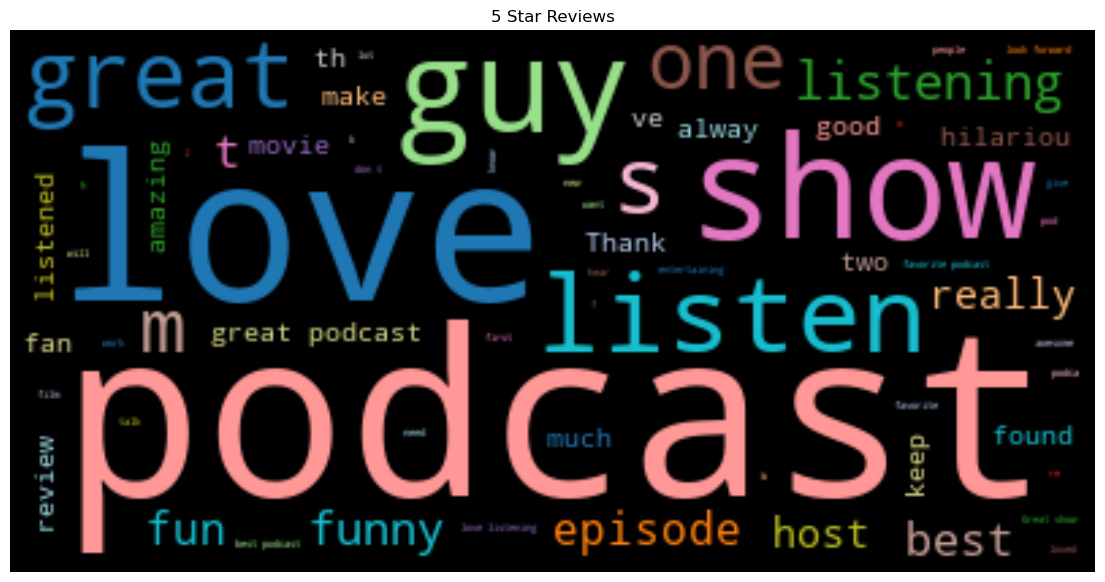

In [41]:
default_colors = wc.to_array()
plt.figure(figsize=(14,12))
plt.title("5 Star Reviews")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
# in this section I created a wordcloud for the 5 star reviews and their most frequent words from the reviews. 

## 7. Create n-grams for 5 star reviews

#### **OBJECTIVE:** Which words or phrases are the most common for 5-star reviews? In this section, you will perform the steps and techniques to format the text and then count the frequency of either as one word, a bi-gram, a tri-gram, or a quad-gram.

### 7a. Create a counter for 5-star reviews 

In [53]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [104]:
cachedStopWords = set(stopwords.words("english"))
cachedStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [48]:
cachedStopWords = set(stopwords.words("english"))
cachedStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [49]:
text = nltk.word_tokenize(text_reviews_5)
text

['97',
 'This',
 'is',
 'by',
 'far',
 'the',
 'best',
 'podcast',
 'for',
 'everything',
 '...',
 '128',
 'I',
 "'ve",
 'nothing',
 'to',
 'add',
 'to',
 'the',
 'previous',
 'reviews',
 '.',
 '...',
 '129',
 'As',
 'soon',
 'as',
 'I',
 'bought',
 'the',
 'Batman',
 'series',
 'on',
 'DVD',
 ',',
 '...',
 '130',
 'Tim',
 'and',
 'Paul',
 'not',
 'only',
 'have',
 'an',
 'excellent',
 'on-air',
 '...',
 '131',
 'Since',
 'I',
 "'ve",
 'come',
 'across',
 '``',
 'To',
 'the',
 'Batpoles',
 ',',
 "''",
 'my',
 'u',
 '...',
 '132',
 'Anyone',
 'who',
 'watched',
 'or',
 'watches',
 '60',
 '’',
 's',
 'Batman',
 'don',
 '’',
 '...',
 '133',
 'I',
 'discovered',
 'this',
 'podcast',
 'a',
 'little',
 'late',
 'in',
 'the',
 '...',
 '134',
 'As',
 'enjoyable',
 'as',
 'the',
 'series',
 'itself',
 '.',
 'Begorah',
 '!',
 '135',
 'After',
 'reading',
 'the',
 'reviews',
 'that',
 'precede',
 'mine',
 ',',
 'I',
 '...',
 '136',
 'Hosts',
 'Tim',
 'and',
 'Paul',
 "'s",
 'obvious',
 'affection

In [50]:

tokens_5 = [w for w in nltk.word_tokenize(text_reviews_5.lower())
        if w.isalpha()]

In [51]:

no_stops_5 = [t for t in tokens_5
        if t not in cachedStopWords]

In [57]:

Counter(no_stops_5).most_common(20)

[('podcast', 18562),
 ('love', 13355),
 ('great', 7457),
 ('show', 5123),
 ('guys', 4097),
 ('listening', 4042),
 ('listen', 3510),
 ('best', 3051),
 ('really', 2655),
 ('one', 2547),
 ('like', 2502),
 ('fun', 2221),
 ('podcasts', 2206),
 ('funny', 2064),
 ('favorite', 1899),
 ('good', 1775),
 ('fan', 1764),
 ('episode', 1601),
 ('every', 1515),
 ('always', 1510)]

In [59]:
cachedStopWords.update(('podcast', 'show','podcasts','listening','listen'))

In [61]:
no_stops_5 = [t for t in tokens_5
        if t not in cachedStopWords]

In [63]:
Counter(no_stops_5).most_common(20)

[('love', 13355),
 ('great', 7457),
 ('guys', 4097),
 ('best', 3051),
 ('really', 2655),
 ('one', 2547),
 ('like', 2502),
 ('fun', 2221),
 ('funny', 2064),
 ('favorite', 1899),
 ('good', 1775),
 ('fan', 1764),
 ('episode', 1601),
 ('every', 1515),
 ('always', 1510),
 ('two', 1474),
 ('much', 1470),
 ('first', 1242),
 ('hosts', 1237),
 ('movie', 1205)]

In [67]:
from nltk.util import ngrams

In [69]:
bigrams = ngrams(no_stops_5, 2)
Counter(bigrams).most_common(20)

[(('love', 'love'), 978),
 (('look', 'forward'), 773),
 (('love', 'guys'), 620),
 (('star', 'wars'), 486),
 (('absolutely', 'love'), 452),
 (('every', 'week'), 447),
 (('really', 'enjoy'), 445),
 (('one', 'favorite'), 411),
 (('one', 'best'), 375),
 (('great', 'job'), 336),
 (('guys', 'great'), 332),
 (('love', 'much'), 318),
 (('every', 'episode'), 261),
 (('great', 'love'), 244),
 (('long', 'time'), 239),
 (('forward', 'every'), 223),
 (('huge', 'fan'), 217),
 (('big', 'fan'), 213),
 (('feel', 'like'), 205),
 (('love', 'great'), 191)]

In [71]:
# in this section I created a counter for the most common words used when doing 5 star reviews, got rid of some redundent words and created a bigram.

### 7b. Create a counter using lemmatizing for 5 star-reviews 

In [74]:
from nltk.stem import WordNetLemmatizer

In [76]:
wordnet_lemmatizer = WordNetLemmatizer()

In [78]:
lemmatized_5 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops_5]

In [79]:
text_bow_5 = Counter(lemmatized_5)
text_bow_5.most_common(20)

[('love', 13476),
 ('great', 7460),
 ('guy', 4350),
 ('best', 3051),
 ('really', 2655),
 ('one', 2579),
 ('like', 2535),
 ('movie', 2297),
 ('episode', 2242),
 ('fun', 2222),
 ('fan', 2100),
 ('funny', 2070),
 ('favorite', 1961),
 ('good', 1777),
 ('host', 1748),
 ('every', 1515),
 ('always', 1510),
 ('two', 1474),
 ('much', 1470),
 ('time', 1304)]

In [88]:
text_chart = pd.DataFrame(text_bow_5.most_common(20), columns = ['word','freq'])

In [90]:
text_chart

,word,freq
0,love,13476
1,great,7460
2,guy,4350
3,best,3051
4,really,2655
5,one,2579
6,like,2535
7,movie,2297
8,episode,2242
9,fun,2222


In [92]:

bigrams_lem_5 = ngrams(lemmatized_5, 2)
Counter(bigrams_lem_5).most_common(20)

[(('love', 'love'), 981),
 (('look', 'forward'), 773),
 (('love', 'guy'), 642),
 (('star', 'war'), 507),
 (('absolutely', 'love'), 453),
 (('one', 'favorite'), 452),
 (('every', 'week'), 448),
 (('really', 'enjoy'), 445),
 (('one', 'best'), 375),
 (('guy', 'great'), 341),
 (('great', 'job'), 337),
 (('love', 'much'), 318),
 (('feel', 'like'), 311),
 (('every', 'episode'), 261),
 (('great', 'host'), 245),
 (('great', 'love'), 244),
 (('long', 'time'), 239),
 (('forward', 'every'), 223),
 (('huge', 'fan'), 219),
 (('big', 'fan'), 218)]

In [94]:

trigrams_lem_5 = ngrams(lemmatized_5, 3)
Counter(trigrams_lem_5).most_common(20)

[(('love', 'love', 'love'), 291),
 (('look', 'forward', 'every'), 219),
 (('forward', 'every', 'week'), 133),
 (('keep', 'good', 'work'), 92),
 (('long', 'time', 'listener'), 88),
 (('best', 'star', 'war'), 79),
 (('love', 'look', 'forward'), 76),
 (('keep', 'great', 'work'), 67),
 (('always', 'look', 'forward'), 65),
 (('hi', 'tessa', 'brizzy'), 64),
 (('star', 'war', 'fan'), 62),
 (('ca', 'get', 'enough'), 56),
 (('guy', 'great', 'job'), 49),
 (('every', 'week', 'love'), 41),
 (('listened', 'every', 'episode'), 38),
 (('love', 'guy', 'great'), 38),
 (('listened', 'first', 'episode'), 37),
 (('love', 'star', 'war'), 37),
 (('look', 'forward', 'new'), 36),
 (('love', 'dax', 'monica'), 36)]

In [96]:

quadgrams_lem_5 = ngrams(lemmatized_5, 4)
Counter(quadgrams_lem_5).most_common(20)

[(('look', 'forward', 'every', 'week'), 131),
 (('love', 'look', 'forward', 'every'), 30),
 (('love', 'always', 'keep', 'interested'), 28),
 (('love', 'love', 'love', 'love'), 25),
 (('long', 'time', 'listener', 'first'), 25),
 (('look', 'forward', 'new', 'episode'), 24),
 (('time', 'listener', 'first', 'time'), 23),
 (('say', 'enough', 'good', 'thing'), 22),
 (('look', 'forward', 'every', 'episode'), 18),
 (('hi', 'tessa', 'brizzy', 'name'), 16),
 (('every', 'week', 'look', 'forward'), 15),
 (('forward', 'every', 'week', 'love'), 14),
 (('great', 'keep', 'good', 'work'), 13),
 (('listener', 'first', 'time', 'reviewer'), 13),
 (('hi', 'name', 'julia', 'schoepke'), 13),
 (('name', 'julia', 'schoepke', 'year'), 13),
 (('keep', 'good', 'work', 'guy'), 12),
 (('guy', 'keep', 'good', 'work'), 11),
 (('far', 'best', 'star', 'war'), 11),
 (('one', 'best', 'star', 'war'), 11)]

In [ ]:
# In this sectiom I created mutiple n-grams for 5 star reviews and lemmatized them.

### 7c. Explain the results for the n-grams for 5-star reviews

#### When analyzing the different n-grams, it's clear that the combinations of words change as the n-gram size increases. One particularly intriguing pattern is the repetition of "love love love love" in the bi-grams through quad-grams, which makes me curious about what listeners love so much about this podcast that they rate it five stars. As expected, positive feedback often includes phrases expressing anticipation for new episodes, such as "new episode," "every week," or references to being a "long-time listener," highlighting the audience's enthusiasm and loyalty to the show.

In [102]:
# this is my explaining the results that was received from the n-grams for the 5 star reviews

## 8 Create n-grams for 1 star reviews

#### **OBJECTIVE:** Now that we have looked at 5-star reviews, let’s take a look at the most common words for 1-star reviews? In this section, you will perform the steps and techniques to format the text and then count the frequency of either as one word, a bi-gram, a tri-gram, or a quad-gram.

### 8a. Create a counter for 1-star revires

In [188]:
from nltk.corpus import stopwords


In [190]:
cachedStopWords = set(stopwords.words("english"))
cachedStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [192]:
text_1 = nltk.word_tokenize(text_reviews_1)
text_1

['1526',
 'let',
 'me',
 'look',
 'for',
 'reasons',
 'to',
 'criticize',
 'you',
 'like',
 '...',
 '1528',
 'He',
 '’',
 's',
 'just',
 'not',
 'that',
 'funny',
 ',',
 'but',
 'forces',
 'bad',
 'humor',
 '...',
 '1530',
 'Couldn',
 '’',
 't',
 'get',
 'through',
 'one',
 'episode',
 '(',
 'Fyre',
 ')',
 '.',
 'Pres',
 '...',
 '1536',
 'Absolute',
 'rubbish',
 '.',
 'The',
 'hosts',
 'are',
 'pathetic',
 'and',
 'm',
 '...',
 '1538',
 'I',
 '’',
 'm',
 'a',
 'huge',
 'fan',
 'of',
 'TechCrunch',
 'so',
 'when',
 'I',
 'saw',
 'thi',
 '...',
 '1539',
 'This',
 'was',
 'really',
 'boring',
 '.',
 'One',
 'of',
 'the',
 'hosts',
 'wasn',
 '’',
 '...',
 '1542',
 'For',
 'me',
 ',',
 'the',
 'entirety',
 'of',
 'a',
 'podcast',
 ',',
 'no',
 'matter',
 'h',
 '...',
 '3423',
 'I',
 '’',
 've',
 'only',
 'listened',
 'to',
 'a',
 'few',
 'of',
 'their',
 'podcasts',
 '...',
 '3428',
 'Ca',
 "n't",
 'fap',
 'to',
 'this',
 ',',
 'needs',
 'more',
 'jar',
 'jar',
 'discussion',
 '.',
 '3430',

In [194]:
tokens_1 = [w for w in nltk.word_tokenize(text_reviews_1.lower())
        if w.isalpha()]

In [196]:
no_stops_1 = [t for t in tokens_1
        if t not in cachedStopWords]

In [198]:
Counter(no_stops_1).most_common(20)

[('podcast', 1022),
 ('like', 350),
 ('listen', 320),
 ('love', 315),
 ('used', 296),
 ('show', 278),
 ('really', 244),
 ('listening', 197),
 ('one', 193),
 ('rachel', 169),
 ('episode', 143),
 ('listened', 142),
 ('get', 140),
 ('time', 134),
 ('much', 130),
 ('fan', 126),
 ('guys', 126),
 ('good', 120),
 ('would', 112),
 ('people', 109)]

In [200]:
bigrams = ngrams(no_stops_1, 2)
Counter(bigrams).most_common(20)

[(('love', 'podcast'), 77),
 (('used', 'love'), 77),
 (('like', 'podcast'), 56),
 (('listen', 'podcast'), 43),
 (('listening', 'podcast'), 36),
 (('waste', 'time'), 36),
 (('wanted', 'like'), 32),
 (('used', 'listen'), 29),
 (('enjoy', 'podcast'), 27),
 (('used', 'enjoy'), 25),
 (('ben', 'ashley'), 24),
 (('listened', 'podcast'), 23),
 (('really', 'wanted'), 23),
 (('huge', 'fan'), 22),
 (('podcast', 'used'), 22),
 (('please', 'stop'), 22),
 (('star', 'wars'), 22),
 (('many', 'ads'), 21),
 (('tried', 'listen'), 20),
 (('podcast', 'really'), 19)]

In [202]:
# in this section I created a counter for the most common words used when doing 1 star reviews, got rid of some redundent words and created a bigram.

### 8b Create a counter using lemmatizing for 1-star reviews 

In [224]:
lemmatized_1 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops_1]

In [226]:
text_bow_1 = Counter(lemmatized_1)

In [228]:
text_bow_1.most_common(20)

[('podcast', 1022),
 ('like', 354),
 ('love', 323),
 ('listen', 320),
 ('show', 298),
 ('used', 296),
 ('really', 244),
 ('episode', 234),
 ('listening', 197),
 ('one', 195),
 ('host', 191),
 ('guy', 176),
 ('rachel', 169),
 ('get', 155),
 ('time', 147),
 ('listened', 142),
 ('fan', 139),
 ('much', 130),
 ('good', 120),
 ('would', 112)]

In [230]:
text_chart_1 = pd.DataFrame(text_bow_1.most_common(20), columns = ['word','freq'])

In [244]:
text_chart_1

,word,freq
0,podcast,1022
1,like,354
2,love,323
3,listen,320
4,show,298
5,used,296
6,really,244
7,episode,234
8,listening,197
9,one,195


In [246]:
bigrams_lem_1 = ngrams(lemmatized_1, 2)
Counter(bigrams_lem_1).most_common(20)

[(('love', 'podcast'), 77),
 (('used', 'love'), 77),
 (('like', 'podcast'), 56),
 (('listen', 'podcast'), 43),
 (('listening', 'podcast'), 36),
 (('waste', 'time'), 36),
 (('wanted', 'like'), 32),
 (('used', 'listen'), 29),
 (('enjoy', 'podcast'), 27),
 (('used', 'enjoy'), 25),
 (('sound', 'like'), 24),
 (('ben', 'ashley'), 24),
 (('listened', 'podcast'), 23),
 (('really', 'wanted'), 23),
 (('huge', 'fan'), 22),
 (('podcast', 'used'), 22),
 (('please', 'stop'), 22),
 (('star', 'war'), 22),
 (('many', 'ad'), 21),
 (('tried', 'listen'), 20)]

In [248]:
trigrams_lem_1 = ngrams(lemmatized_1, 3)
Counter(trigrams_lem_1).most_common(20)

[(('used', 'love', 'podcast'), 45),
 (('wanted', 'like', 'podcast'), 20),
 (('really', 'wanted', 'like'), 17),
 (('used', 'enjoy', 'podcast'), 12),
 (('want', 'like', 'podcast'), 9),
 (('used', 'listen', 'podcast'), 8),
 (('rachel', 'salty', 'hell'), 8),
 (('used', 'one', 'favorite'), 7),
 (('could', 'give', 'star'), 7),
 (('used', 'love', 'show'), 7),
 (('used', 'favorite', 'podcast'), 7),
 (('used', 'really', 'like'), 7),
 (('wish', 'could', 'give'), 7),
 (('long', 'time', 'listener'), 7),
 (('listening', 'podcast', 'since'), 6),
 (('would', 'much', 'better'), 6),
 (('really', 'like', 'podcast'), 6),
 (('started', 'listening', 'podcast'), 6),
 (('huge', 'fan', 'podcast'), 6),
 (('hey', 'girl', 'hey'), 6)]

In [250]:
quadgrams_lem_1 = ngrams(lemmatized_1, 4)
Counter(quadgrams_lem_1).most_common(20)

[(('really', 'wanted', 'like', 'podcast'), 13),
 (('wish', 'could', 'give', 'star'), 6),
 (('used', 'really', 'like', 'podcast'), 5),
 (('unsubscribed', 'happy', 'david', 'finally'), 5),
 (('absolutely', 'loved', 'first', 'podcasts'), 5),
 (('ashley', 'said', 'podcast', 'reporting'), 4),
 (('kaitlyn', 'fake', 'appearance', 'prea'), 4),
 (('used', 'enjoy', 'kaitlyn', 'personal'), 4),
 (('enjoy', 'kaitlyn', 'personal', 'story'), 4),
 (('kaitlyn', 'personal', 'story', 'bu'), 4),
 (('rachel', 'salty', 'hell', 'think'), 4),
 (('used', 'really', 'enjoy', 'podcast'), 3),
 (('podcast', 'would', 'much', 'better'), 3),
 (('typical', 'male', 'bro', 'background'), 3),
 (('male', 'bro', 'background', 'e'), 3),
 (('used', 'love', 'podcast', 'feel'), 3),
 (('love', 'podcast', 'feel', 'like'), 3),
 (('used', 'one', 'favorite', 'podcasts'), 3),
 (('really', 'want', 'like', 'podcast'), 3),
 (('ben', 'ashley', 'self', 'aggrandizing'), 3)]

In [252]:
# In this sectiom I created mutiple n-grams for 1 star reviews and lemmatized them.

### 8c Explain the results for the n-grams for 1-star reviews

#### Analyzing the results can be confusing when focusing solely on singular tokenized words, as distinguishing between 1-star and 5-star reviews becomes challenging. However, using n-grams provides much clearer insights, especially for identifying patterns in 1-star reviews. One interesting finding from the quad-grams is that some reviewers expressed sentiments like "wanted to like the podcast" or "used to love it," which raises questions about what might have caused their opinions to shift so drastically. Additionally, it appears that some listeners are dissatisfied with Kaitlyn, the personal storytelling format, or the recurring themes involving the "typical male background." These patterns offer valuable insights into the aspects of the podcast that might be alienating certain audiences.

In [ ]:
# this is my explaining the results that was received from the n-grams for the 1 star reviews

## 9. Analyze the results for 5-star and 1-star

#### **OBJECTIVE:** So what do you see? Is there anything interesting? Let’s dive into the results and see what is most interesting.

### 9a. Who is Brizzy and who is Kaitlyn

In [271]:
pd.set_option('display.max_colwidth',1)
df_pod_film_content = df_pod_film[['title','review_title','content','rating']]
df_pod_film_content[df_pod_film_content['content'].str.contains("Brizzy")]

,title,review_title,content,rating
392292,Disney News Weekly,CNN For Disney Lovers,"I always look forward to Wednesday nights every week thanks to this awesome show! As big of a Disney lover I am, it’s nice to sit down & watch an hour long show to catch up on or just hear input on current Disney news! I follow Leo, Sarah, and Keetin on all social media platforms, they’re all so hilarious together, plus love the special guests they bring on occasionally (Lil P, Tiff, Aldy, Brizzy, etc.), highly recommend!",5
589664,Fantastic Geeks (and where to find them),I need help ( Ravenclaw Riddle ),"Hey Brizzy and Tessa! I need advice. My friends are constantly ghosting me and I don’t know why. We have a group chat and when the 2 of them text, they always answer right away. But when I text, I never get a response. And at school 1 of them was my friend all week until the other friend came back from being sick all week. I was back to sitting alone at lunch :( what should I do? I still enjoy having friends but they act like I am their back-up. PLZ HELP ME :(\n\n-Me",5
589665,Fantastic Geeks (and where to find them),You probably won’t read this 🙂,"Hey Tessa and Brizzy my name is Iris and I’am a Gryffindor. I know you guy talk about Harry Potter but if you have heard of Young Justice, Avatar the last Aribender, or Legend of Korra and if you have what are your opinions of them. Young justice is a show from DC and Avatar and Korra are apart of the same universe but in different times. Harry Potter, Avatar, Young justice, and Korra are all my favorite things to watch. \n\nPS: If you haven’t seen these shows you should watch them they are great.",5
589666,Fantastic Geeks (and where to find them),Love it!,"I love this podcast! I like to listen to it while I draw, waiting for the bus, after school, or when I’m just bored. I’m a huge Potterhead and Ravenclaw!\n\nSome people have been saying that Brizzy and Tessa’s energy and personalities are obnoxious and fake because they’re very happy and outspoken. I find it refreshing and comforting to finally find positive people within the pessimistic face of the media. I for one enjoy their joyous outlook on life. I respect people’s opinion, but please don’t hate on the podcast itself just because you don’t like their personalities.",5
589669,Fantastic Geeks (and where to find them),Gryffindor geek,"Dear Tessa and Brizzy, \nThanks so much for you’re vids you cheer me up so thanks :-) \nLove Gryffindor girl/ Anna",5
...,...,...,...,...
590578,Fantastic Geeks (and where to find them),Love this podcast so much,Hey Tessa and Brizzy I love this podcast so much!!!! I got my dad to listen and now we have grown closer and have a lot of fun talking about the podcast. I’m a Hufflepuff (according to the percentage test I’m 95% hufflepuff) and my Ravenclaw riddle for you is if you could bring seven characters from the Wizarding World characters to hang out with (time period doesn’t matter so you can hang out with Tina Goldstein and Hermione) who would you pick and where would you hang out.\nLove Duke AKA The OnyxHufflepuff\nSending lots of hufflepuff huggles,5
590584,Fantastic Geeks (and where to find them),I am finally home,I have been listening for a while and I LOVE it!! I watch their YouTube channels and their podcast and it is relaxing and amazing!! keep doing the great work Anna (Brizzy) and Tessa!,5
590588,Fantastic Geeks (and where to find them),This is the best!,This podcast is truly the best podcast I ever listened to! I started out a Disney lover watching Brizzy’s channel then I started reading Harry Potter. Besides reading I do theater! I am a Ravenclaw 💙🧡(pretend that orange heart is bronze) my anti house is slytherin! 💚🖤(pretend that heart is silver).,5
893031,Speech Bubble,Love This!!! But....,"You are awesome Jace!! (And butch too) lol JK I love u both. Anyway, I LOVE Fairly Odd Parents. I actualy came from Fantastc Geeks, Brizzy Voices, and Tessa Nettings channel. I always cringe when you say stuff about

In [273]:
df_pod_film_content[df_pod_film_content['content'].str.contains("Kaitlyn")]

,title,review_title,content,rating
311399,Scrubbing In with Becca Tilley & Tanya Rad,Breath of Fresh Air,"I’ve never followed you much, but I heard you on Nick’s podcast and enjoyed listening to you. After all the dirty and over-the-top stuff I hear on Nick’s and Kaitlyn’s podcasts, this is a breath of fresh air. I’m switching over 😊😊",5
377209,Your Favorite Thing with Wells & Brandi,Love,Love the pod and would love to hear Kaitlyn! Hilarious Elmer Fudd voice Wells!,5
377323,Your Favorite Thing with Wells & Brandi,Get your facts straight - from a frustrated Canadian,"Let me start by saying your podcast is my favourite thing to listen to! Ding ding ding. And super excited to see Brandi on Kaitlyn’s tour in Phoenix. BUT I have to call you guys out on your “Heart of a Champion” episode. It irked me SO much that Brandi said she wanted any NBA team to win the championship other than the Warriors. Um HELLO let me rewind to the 2019 WINNERS... the Toronto Raptors!!! We are ALWAYS the underdogs and even when we win people seem to forget! The Warriors dynasty is over with Steph and Klay injuries and Durant leaving. Also, sorry Wells but the Pelicans are are not going to come out of the West. Us Canadians are probably too polite to correct you, but this just annoyed me wayyy too much not to bring it to your attention.",5
377439,Your Favorite Thing with Wells & Brandi,Best Podcast,"I listen to about 12 Podcasts and this is the one that gets me overly excited when a new episode pops up. Wells is a gem. He is hilarious, witty real and genuine.\n\nBrandi, stop trying to act like Kaitlyn Bristowe and putting “skies” in your words. “Skies” was originally from Shawn Booth anyways.",5
377520,Your Favorite Thing with Wells & Brandi,"5 stars, BUT...","This podcast totally deserves 5 stars, but I’m begging you guys- PLEASE don’t make Kaitlynn Jenner a co-host again. Her SoCal voice is like nails on a chalkboard, and I honestly cannot listen to one more episode with her in it. Next time, maybe bring in someone who already hosts another podcast and is great to listen to, like Olivia or Kaitlyn Bristowe!❤️",5
...,...,...,...,...
887582,Bachelor Happy Hour with Rachel & Ali – The Official Bachelor Podcast,Come on Becca,This whole “best buy” segment is such a ruse. Becca is obviously (either subconsciously or not) asking for Kaitlyn and Rachel to comment on whether or not they accept her despite the awful behavior of Garrett.,5
887887,Bachelor Happy Hour with Rachel & Ali – The Official Bachelor Podcast,It’s fine but...,"Not my favorite. I like it ok but it can make me cringe. I listen to all the other Bach Nation podcasts first and if I get to it I will listen to this one. Just keeping it real. Rachel has more conviction. Rachel just seems more real. Ali seems to always want to be the nice good guy. It’s not relatable. She waffles on her opinions and beliefs. I wish she would take a stand instead of being so easily influenced by others. She is also a bit over the top at times and likes to always say “because I’m a Mom, I have to be this way”.....as a Mom I’m like WHAT?! I just wish she would have a real actual opinion. She’s too afraid too hurt feelings and looking like a bad guy. Being honest doesn’t have to be cruel, she just needs to own her beliefs and be more assertive. Nick Viall has strong opinions on his podcast but he isn’t rude and I respect his genuineness. I love when Rachel is like “oh, I totally don’t agree”, I just find more realness from Rachel. Kaitlyn B and Ashley I also seem to just be more real and assert themselves instead of worrying what people think of they say something negative about someone. Having an opinion or saying something negative doesn’t mean you are a bully and I feel like that’s what Ali is worried about.",2
888383,Bachelor Happy Hour with Rachel & Ali – The Official Bachelor Podcast,Rachel is beyond rude,I really don’t understand why Rachel even wants to be on a podcast about the bachelor all she does is criticize

In [275]:
df_pod_film_content[df_pod_film_content['content'].str.contains("David")]

title  \
11538    UHF 62nd                                       
11539    UHF 62nd                                       
16150    Synthaholics: A Star Trek Podcast              
17072    Series Regular                                 
20795    Dread Central Podcasts                         
...                         ...                         
1051534  Around the Galaxy - A Star Wars Fan Talkshow   
1051545  Around the Galaxy - A Star Wars Fan Talkshow   
1052307  Johnny Has the Keys                            
1052308  Johnny Has the Keys                            
1052331  Down the Hall                                  

                                       review_title  \
11538    This                                         
11539    It’s like a drink from the firehose!         
16150    Excellent Podcast, very professional!        
17072    A Top Tier Addition from a Reliable Source   
20795    ANONYMOUS 616                                
...                ...                                
1051534  Excellent Show                               
1051545  A Genuinely Awesome Star Wars Podcast        
1052307  A cut above the rest.                        
1052308  Great new podcast!                           
1052331  The Reviews You Actually Want                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [285]:
df_pod_film_content[df_pod_film_content['content'].str.contains("Love")]

,title,review_title,content,rating
97,Eana Mokri - The LearnNa'vi Podcast,Best Podcast,This is by far the best podcast for everything avatar! Love this podcast!,5
1318,Operation Retroshock,Great cast,Love this cast . Keep up the great work,5
1541,Original Content,Just found you! Love you all!!!!,I love that you don’t need an E next to your episode description. Sick of other podcasters being lazy with their vocal. You three are wonderful!!!!! Intelligent! Thoughtful! Balanced. Love you!!! I’m a fan!!!!!,5
2746,Rik Radio,it's a Rik Buritto!,"I Love this show!!! it's everything I want a show to be. fun music, funny skits, movie news, reviews, music video reviews, horror, sci fi, action, comedy.... the list goes on. your one stop shop for excellent nostalgia.",5
3334,MTowne: Where Murder Happens,The inside scoop every Pecker needs!,Love this companion to the Trial and Error saga ! Nina Rudolph gets the inside scoop (though I personally believe Lavinia Peck-Foster is innocent).,5
...,...,...,...,...
1070081,TEDDY & THE EMPRESS: Cooking the Queens,Great Entertainment!,Love this podcast already and can’t wait for more! Perfect mix of commentary and laughs ❤️,5
1070084,TEDDY & THE EMPRESS: Cooking the Queens,Fabulously fantastic,"Love this show! Of course I love drag race, and this podcast is the perfect recap show for fans. The humor, the shade, the cheapness...I’m living for it💖",5
1070085,TEDDY & THE EMPRESS: Cooking the Queens,Love Teddy & The Empress,I really enjoy Teddy’s references- he and I are both ladies of a certain age.Have to teach the children. The Empress is great 40% of the time and totally fabulous the other 60% Every episode is like a Kiki with my girls! Love them!,5
1070087,TEDDY & THE EMPRESS: Cooking the Queens,❤️❤️❤️,Love the podcast. My favorite people to listen to ❤️,5


In [ ]:
#In this section I created filters that were used to show reviews with key words in them.

### 9b. Create a dataframe for tri-grams for 5 star and 1 star 

In [331]:
trigrams_lem_1 = ngrams(lemmatized_1, 3)
df_trigrams_lem_1 =Counter(trigrams_lem_1)

In [333]:
trigrams_lem_5 = ngrams(lemmatized_5, 3)
df_trigrams_lem_5 =Counter(trigrams_lem_5)

In [335]:
df_trigram_1= pd.DataFrame(df_trigrams_lem_1.most_common(20), columns = ['word_1','freq_1'])

In [337]:
df_trigram_5= pd.DataFrame(df_trigrams_lem_5.most_common(20), columns = ['word_5','freq_5'])

In [339]:
df_trigrams = pd.concat([df_trigram_1,df_trigram_5], axis=1)

In [341]:
df_trigrams

,word_1,freq_1,word_5,freq_5
0,"(used, love, podcast)",45,"(love, love, love)",291
1,"(wanted, like, podcast)",20,"(look, forward, every)",219
2,"(really, wanted, like)",17,"(forward, every, week)",133
3,"(used, enjoy, podcast)",12,"(keep, good, work)",92
4,"(want, like, podcast)",9,"(long, time, listener)",88
5,"(used, listen, podcast)",8,"(best, star, war)",79
6,"(rachel, salty, hell)",8,"(love, look, forward)",76
7,"(used, one, favorite)",7,"(keep, great, work)",67
8,"(could, give, star)",7,"(always, look, forward)",65
9,"(used, love, show)",7,"(hi, tessa, brizzy)",64


In [329]:
#I took the most common 20 trigrams of one star reviews and five star reviews and turned them into a datarame, where they are side by side for comparison

### 9c. Explain the results from your analysis

From the results, it’s clear that sentiments toward Brizzy and Kaitlyn differ significantly. Brizzy is widely loved, with many praising her voice and enthusiasm for sharing everything Harry Potter-related, leading to overwhelmingly positive feedback about her podcast. On the other hand, Kaitlyn evokes mixed reactions. While some reviews rate her highly, others are highly critical, disliking her voice, opinions, and even her personality, with some expressing that they never want to hear her on the podcast again.

When analyzing mentions of the name "David," it became apparent that it’s a common name, and its occurrence in reviews spans multiple podcasters, which isn’t surprising. The word "love" appeared frequently in both 1-star and 5-star reviews. For 1-star reviews, it often reflected disappointment, with phrases like "used to love the podcast," suggesting that something changed to shift their opinion negatively. In contrast, in 5-star reviews, "love" was used to express adoration for the podcast, its hosts, and its content.

The trigrams further illustrate this divide: 1-star reviews tend to come from disillusioned fans who once enjoyed the podcast but no longer do, while 5-star reviews are from both new fans and long-time listeners who appreciate the humor and quality, often mentioning how they eagerly await new episodes weekly.

In [ ]:
# In this last portion I explained the results of all of section 9 with the differnt n-grams.